

# DAND Project: TMDB Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project i will analyze data based on TMDB movies dataset based on multiple criteria which are genres, year of release, and more.


I will walk through TMDB Movies dataset to answer multiple questions:





1-Is the popularity of movies increasing over the years or decreasing


2-If the movie have high average voting means that the move gained more profit

3-What is the most profit movie

4-What is the less profit movie

5-What is the most popular movie

6-What is the less popluar movie

7-What is the movie with highest voting

8-What is the movie with lowest voting

9-What is the most genre we have

10-Does the runtime affect the profitability of the movie

11-Does the pepole tend to watch old movies or new one

12-What is the average voting from the people

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [45]:
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Loading the data and view sample of them to know how it looks

In [46]:
df.shape

(10866, 21)

### To understand the size of the dataset that i will analyze the left side for (rows) right side for (columns)

In [47]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### To have closer look for some statistics overview for the columns

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### I have used (info()) function to know how many missing values i have in the dataset, and what are the datatype of each column

In [49]:
df.drop(columns = ['id','imdb_id','cast','homepage','tagline','keywords','overview','production_companies','budget','revenue'], inplace = True)


In [50]:
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   director        10822 non-null  object 
 3   runtime         10866 non-null  int64  
 4   genres          10843 non-null  object 
 5   release_date    10866 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


### I have droped some of the columns that I will not use during my analysis, then I have checked whether it has been deleted or not

In [52]:
df.dropna(subset = ['director','genres'], how = 'any', inplace=True)
df.isnull().sum()

popularity        0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10801 non-null  float64
 1   original_title  10801 non-null  object 
 2   director        10801 non-null  object 
 3   runtime         10801 non-null  int64  
 4   genres          10801 non-null  object 
 5   release_date    10801 non-null  object 
 6   vote_count      10801 non-null  int64  
 7   vote_average    10801 non-null  float64
 8   release_year    10801 non-null  int64  
 9   budget_adj      10801 non-null  float64
 10  revenue_adj     10801 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1012.6+ KB


### I have found some null values in (director, genres) columns so, I have delete them and then checked if there is any null value for our dataset or not.

In [54]:
sum(df.duplicated())

1

In [55]:
df.drop_duplicates(inplace = True)

In [56]:
sum(Df.duplicated())

0

### I have checked the number of the duplicated rows in the whole dataset which is one duplicate row then, I have deleted the duplicate row then, I checked again to ensure it is has been deleted

In [57]:
budget_mean = df['budget_adj'].mean()
revenue_mean = df['revenue_adj'].mean()
runtime_mean = df['runtime'].mean()
budget_mean, revenue_mean, runtime_mean

(17654371.81052641, 51677135.50526413, 102.18972222222222)

In [58]:
df['budget_adj']= df['budget_adj'].replace(0, budget_mean)
df['revenue_adj']= df['revenue_adj'].replace(0, revenue_mean)
df['runtime']= df['runtime'].replace(0, runtime_mean)
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649455,102.454659,218.600741,5.970880,2001.289537,2.686734e+07,8.015698e+07
std,1.002441,30.339749,577.165055,0.933006,12.819545,3.057304e+07,1.369205e+08
min,0.000188,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.209157,90.000000,17.000000,5.400000,1995.000000,1.765437e+07,5.167714e+07
50%,0.385471,99.000000,39.000000,6.000000,2006.000000,1.765437e+07,5.167714e+07
75%,0.717508,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,5.167714e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### I take the mean for each numeric coulmns to replace each zero value with the mean to make the analysis more accurate

In [59]:
df.dtypes

popularity        float64
original_title     object
director           object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [60]:
df['release_date']= pd.to_datetime(df['release_date']) 

In [61]:
df.dtypes

popularity               float64
original_title            object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

### I checked in each coulmns datatype and whether it is applicable or not, then i noticed that (release_date) coulmn has string data type and that will make the manipulation and compersion harder or impossible, so I change it to datetime datatype is it shown in the above cell

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is the popularity of movies increasing over the years or decreasing?)

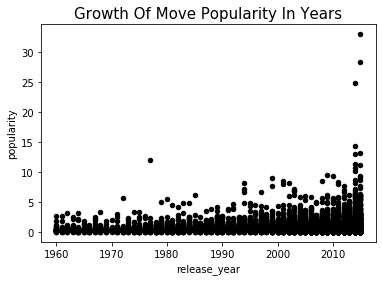

In [62]:
df.plot(x = 'release_year',y='popularity',kind='scatter',color = 'black', fontsize = 10);
plt.title('Growth Of Move Popularity In Years', fontsize = 15);

### Here I compare between the popularity of each movie based on the release year, and whether the popularity increased over the years or decreased. The scatter chart shows that the popularity in general increasing over the years espically last ten years 

### Research Question 2  (If the movie have high average voting means that the move gained more profit ?)

In [63]:
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [64]:
profit_mean = df['profit_adj'].mean()
profit_mean

53289640.63948243

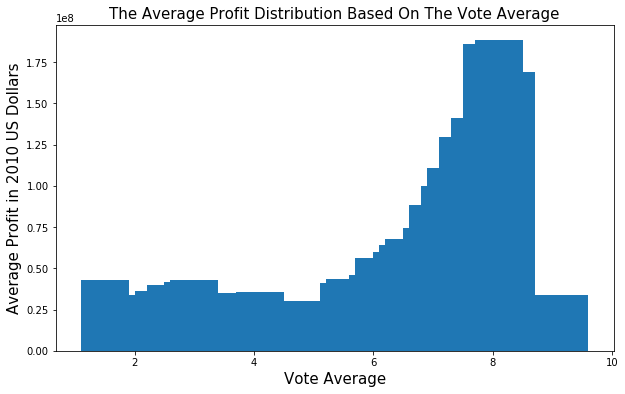

In [148]:

profit_year_mean = df.groupby('vote_average')['profit_adj'].mean()

plt.figure(figsize=(10,6))
plt.title('The Average Profit Distribution Based On The Vote Average', fontsize=15)
plt.xlabel('Vote Average',fontsize=15)
plt.ylabel('Average Profit in 2010 US Dollars',fontsize=15)
plt.bar(profit_year_mean .index, profit_year_mean );

#### 1-Firstly to answer this question I have to found the (profit) based on the (revenue) - (budget)
#### 2-Secondly I have to find the mean of the (profit)
#### 3-Then i plot it in bar chart, and the answer shows that the movie with higher (vote average) have higher (profit)

### Research Question 3  (What is the most profit movie?)

In [85]:
max_profit = df['profit_adj'].idxmax()
df.loc[max_profit]

popularity                                 12.0379
original_title                           Star Wars
director                              George Lucas
runtime                                        121
genres            Adventure|Action|Science Fiction
release_date                   1977-03-20 00:00:00
vote_count                                    4428
vote_average                                   7.9
release_year                                  1977
budget_adj                             3.95756e+07
revenue_adj                            2.78971e+09
profit_adj                             2.75014e+09
Name: 1329, dtype: object

### Research Question 4  (What is the less profit movie?)

In [126]:
min_profit = df['profit_adj'].idxmin()
df.loc[min_profit]


popularity                                          0.25054
original_title                            The Warrior's Way
director                                         Sngmoo Lee
runtime                                                 100
genres            Adventure|Fantasy|Action|Western|Thriller
release_date                            2010-12-02 00:00:00
vote_count                                               74
vote_average                                            6.4
release_year                                           2010
budget_adj                                         4.25e+08
revenue_adj                                     1.10876e+07
profit_adj                                     -4.13912e+08
Name: 2244, dtype: object

### Research Question 5  (What is the most popular movie?)

In [128]:
max_profit = df['popularity'].idxmax()
df.loc[max_profit]

popularity                                          32.9858
original_title                               Jurassic World
director                                    Colin Trevorrow
runtime                                                 124
genres            Action|Adventure|Science Fiction|Thriller
release_date                            2015-06-09 00:00:00
vote_count                                             5562
vote_average                                            6.5
release_year                                           2015
budget_adj                                         1.38e+08
revenue_adj                                     1.39245e+09
profit_adj                                      1.25445e+09
Name: 0, dtype: object

### Research Question 6  (What is the less popluar movie?)

In [129]:
min_profit = df['popularity'].idxmin()
df.loc[min_profit]

popularity                    0.000188
original_title            The Hospital
director                 Arthur Hiller
runtime                            103
genres            Mystery|Comedy|Drama
release_date       1971-12-14 00:00:00
vote_count                          10
vote_average                       6.4
release_year                      1971
budget_adj                 1.76544e+07
revenue_adj                5.16771e+07
profit_adj                 3.40228e+07
Name: 9977, dtype: object

### Research Question 7  (What is the movie with highest voting?)

In [123]:
max_vote = df['vote_average'].idxmax()
df.loc[max_vote]

popularity                             0.006925
original_title    The Story of Film: An Odyssey
director                           Mark Cousins
runtime                                     900
genres                              Documentary
release_date                2011-09-03 00:00:00
vote_count                                   14
vote_average                                9.2
release_year                               2011
budget_adj                          1.76544e+07
revenue_adj                         5.16771e+07
profit_adj                          3.40228e+07
Name: 3894, dtype: object

### Research Question 8  (What is the movie with lowest voting?)

In [125]:
min_vote = df['vote_average'].idxmin()
df.loc[min_vote]

popularity                                 0.12112
original_title                       Transmorphers
director                               Leigh Scott
runtime                                         86
genres            Action|Adventure|Science Fiction
release_date                   2007-06-26 00:00:00
vote_count                                      10
vote_average                                   1.5
release_year                                  2007
budget_adj                             1.76544e+07
revenue_adj                            5.16771e+07
profit_adj                             3.40228e+07
Name: 7772, dtype: object

### In the above cells I have found :
#### 1-The most profit movie
#### 2-The less profit movie
#### 3-The most pouplar movie
#### 4-The less pouplar movie
#### 5- Movie with highest average voting
#### 6- Movie with lowest average voting

### Research Question 9  (What is the most genre we have?)

In [130]:
def spliting(df,column):
    
    data = df[column].str.cat(sep = '|')
    
    
    data = pd.Series(data.split('|'))
    
    counts = data.value_counts(ascending = False)
    
    return counts

In [149]:
genres_counts = spliting(df,'genres')
genres_counts.head(20)

Drama              4754
Comedy             3782
Thriller           2904
Action             2378
Romance            1708
Horror             1636
Adventure          1466
Crime              1353
Family             1223
Science Fiction    1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
dtype: int64

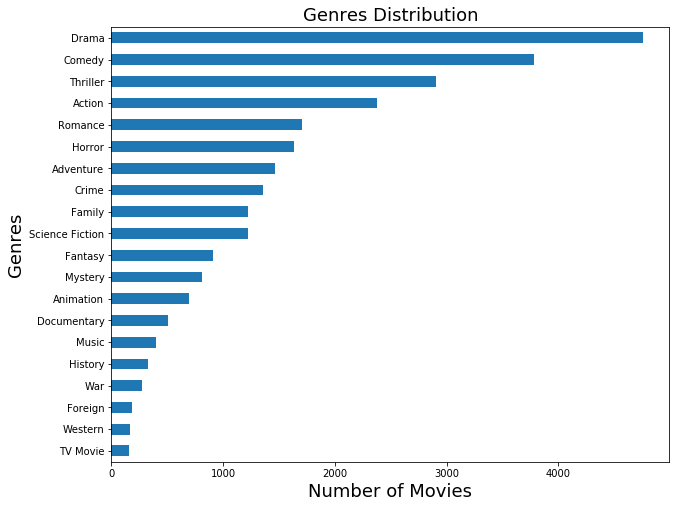

In [119]:
genres_counts.sort_values(ascending = True, inplace=True)
plt.figure(figsize=(10,8))
plt.title('Genres Distribution', fontsize=18)
plt.xlabel('Number of Movies',fontsize=18)
plt.ylabel('Genres',fontsize=18)
genres_counts.plot.barh();

### Firstly, I have create method to split the genres because the genres coulmn seperated by (|) secondly, I pass the geners column to be splitted in the method then, I have created chart to show each genres and what is the most genre we have in our dataset which is (Drama) genre with (4754) movie

### Research Question 10  (Does the runtime affect the profitability of the movie ?)

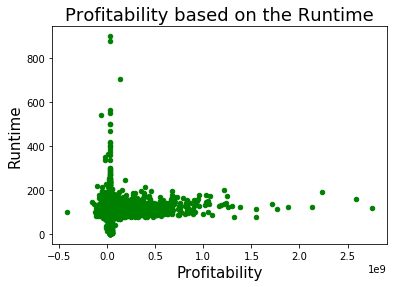

In [146]:
df.plot(x = 'profit_adj', y = 'runtime', kind = 'scatter',color='green');
plt.title('Profitability based on the Runtime', fontsize=18)
plt.xlabel('Profitability', fontsize=15)
plt.ylabel('Runtime', fontsize=15);

### I have created this graph to know whether the runtime affect profitability or not, and what is the most profitable runtime, and i found that the runtime affect the profitability , and the most profitable runtime between (150-200) minutes

### Research Question 11  (Does the pepole tend to watch old movies or new one?)

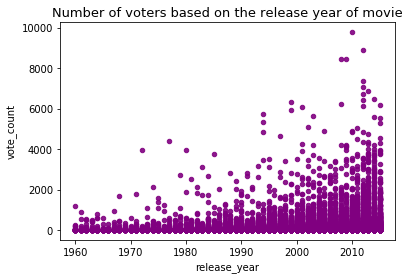

In [135]:
df.plot(x = 'release_year',y='vote_count',kind='scatter',color = 'purple', fontsize = 10, alpha = .9);
plt.title('Number of voters based on the release year of movie', fontsize = 13);

### I have created this scatter chart to know if the pepole tend to see new movies or old based on their vote, and the chart shows that most pepole tend to see the new movies.

### Research Question 12 (What is the average voting from the people?)

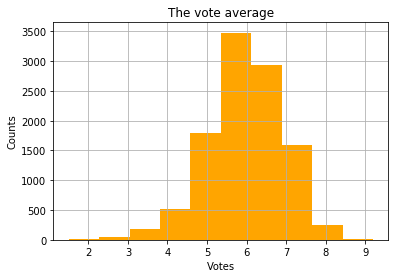

In [147]:
df.vote_average.hist(color = 'orange');
plt.title('The vote average');
plt.xlabel('Votes');
plt.ylabel('Counts');

### I have created this graph to know what is the average voting from the people and it looks like that the average voting between (5.5-6)

<a id='conclusions'></a>
## Conclusions

### Summary:
#### 1-The people become more intersted in movies over the years, as it shown in the graph the popularity last ten years has increased to become between (8-12) and in 1960's the popularity between (2-4)
#### 2-The higher voting means higher profits, in general that make sense because if you have a good movie the people will buy ticket to see it and will give it high vote, but in the graph the movies that have average voting between (8.5-9) have gained less profit than the movies between that have average voting between (7-8)
#### 3- The most profit movie is (Star Wars 1977)  2.75014e+09 which is equal 16.47565559 Billon Dollar from the year of release until 2010
#### 4- The less profit movie is (The Warrior's Way 2010 )  -4.13912e+08 which means the movie have lost money instead of profiting
#### 5-The most popular movie in TMDB dataset is (Jurassic World 2015) but that's doesn't mean the popular movie it is one of the better movie because the average voting is (6.5) 
#### 6- The less popular movie in TMDB dataset is (The Hospital 1977), and it have average voting (6.4) less than the most popular movie with (0.01) so, the popularity doesn't depened on the average voting
#### 7-The highest movie average voting is (The Story of Film: An Odyssey 2011), and it have normal profit so, that means the average voting doesn't depend on the profit
#### 8- The lowest movie average voting is (Transmorphers 2007), and it have the same profit of the highest move voting so, that means the average voting doesn't depend on the profit as i said above
#### 9-What are the genres we have in the dataset, and what are the most genre we have which is (Drama) genre with (4754) movie
#### 10-Is the runtime affect the profitability or not, it looks like the runtime affect the profitability and the most profitabile movies have between (150-200) mintues runtime
#### 11-Is the people tend to see new movies or old one, the graph shows that the most pepole tend to watch new movies for example, movies 1960's have vote count between (500-1500) and the 2010's movies have vote count up to (7000), which means the people tend to see new movies.
#### 12-What is the average vote from people it is between (5.5-7), and the graph have skewed to the left.

### Limitations
#### 1-There are many of zero values in revenue_adj and budget_adj columns. To solve  this problem, I choose to replace the zero value with mean, which may affect the overall analysis. There might be alternative ways to better process this kind of data.
#### 2-I drop some extraneous columns in the data wangling process. Some of them may yield other useful results, such as production_companies, cast, etc.
#### 3-Some of the movies have more than one genre and that will affect the level of accuracy of the analysis